In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv(r"groundwater_forecasting_data.csv")


print(df.head())

   Rainfall  Temperature  Soil_Moisture  Groundwater_Level
0        12           22             45               12.5
1        20           28             55               13.2
2         5           19             35               11.8
3         0           35             20               10.0
4        18           26             50               13.0


In [10]:
X = df[['Rainfall', 'Temperature', 'Soil_Moisture']]
y = df['Groundwater_Level']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [13]:
y_pred = model.predict(X_test)


In [17]:
correlation_matrix = df.corr()



In [14]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

In [15]:
print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² Score: 0.96
Mean Squared Error: 0.00
Root Mean Squared Error: 0.05
Mean Absolute Error: 0.04


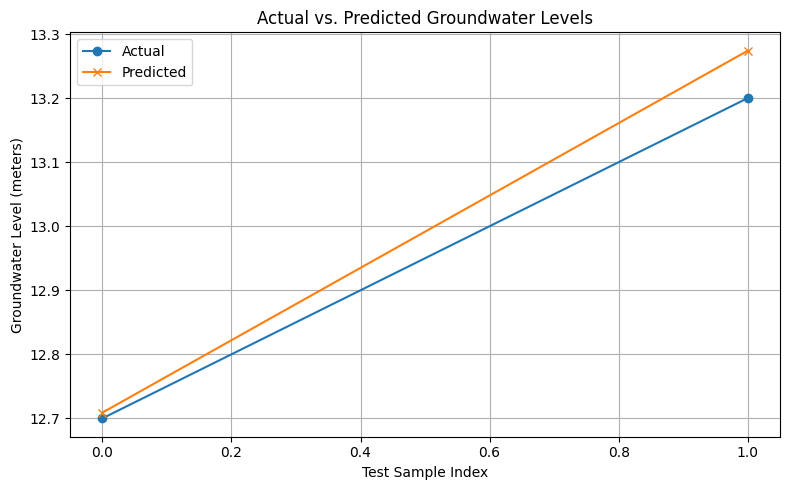

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred, label="Predicted", marker='x')
plt.title("Actual vs. Predicted Groundwater Levels")
plt.xlabel("Test Sample Index")
plt.ylabel("Groundwater Level (meters)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


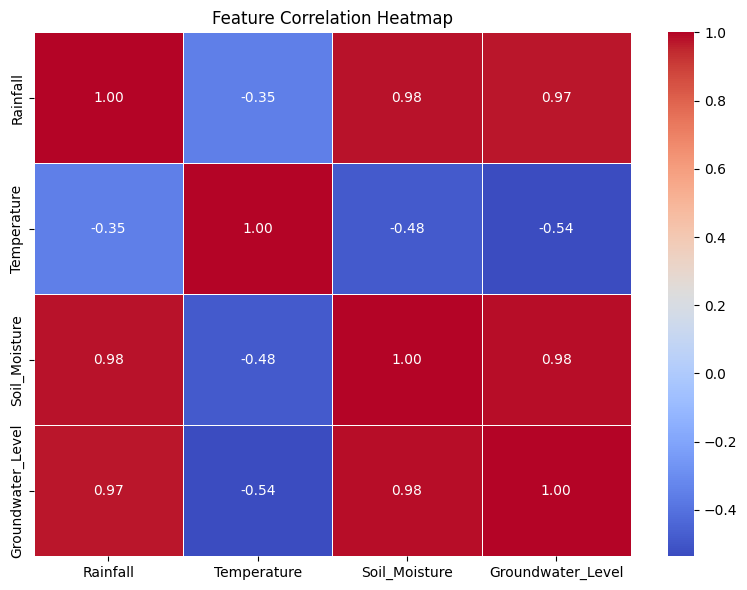

In [20]:

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()